In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# import our dataset
# NOTE: the variable 'df' represents 'data frame'
#full_path = "C:\\Users\\randel.bjorkquist\\Documents\\QuickStart\\DataScience\\Student_Performance.csv"
#df = pd.read_csv(full_path, parse_dates=['Test_Date'])

df = pd.read_csv('./data/admissions.csv', parse_dates=['application_date'], dtype={'approved': 'boolean'})
#df = pd.read_csv('./data/admissions.csv', dtype={'application_date': 'datetime64[ns]'}, dtype={'approved': 'boolean'})


In [43]:
df.head()

,age,employed,income,credit_score,region,application_date,approved
0,22,0,39879,507,West,2023-04-26,False
1,55,1,39475,509,North,2023-10-09,False
2,49,0,36435,486,East,2024-07-04,False
3,39,1,15000,311,East,2023-07-17,False
4,38,1,27037,452,West,2023-04-07,False


In [44]:
print(df.shape)
print(df.columns)


(300, 7)
Index(['age', 'employed', 'income', 'credit_score', 'region',
       'application_date', 'approved'],
      dtype='object')


In [45]:
print("Data Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

#NOTE: Check if there are any duplicated rows
print('\nNumber of duplicationed rows:', df.duplicated().sum())


Data Types:
age                          int64
employed                     int64
income                       int64
credit_score                 int64
region                      object
application_date    datetime64[ns]
approved                   boolean
dtype: object

Missing values per column:
age                 0
employed            0
income              0
credit_score        0
region              0
application_date    0
approved            0
dtype: int64

Number of duplicationed rows: 0


In [46]:
print("describe")
print(df.describe())


describe
              age    employed        income  credit_score     application_date
count  300.000000  300.000000    300.000000    300.000000                  300
mean    41.470000    0.503333  34834.810000    475.800000  2024-01-02 03:21:36
min     18.000000    0.000000  15000.000000    300.000000  2023-01-01 00:00:00
25%     31.000000    0.000000  27478.250000    401.500000  2023-06-24 18:00:00
50%     41.000000    1.000000  34653.500000    475.000000  2023-12-22 12:00:00
75%     52.250000    1.000000  42415.250000    545.250000  2024-07-22 06:00:00
max     65.000000    1.000000  71989.000000    833.000000  2024-12-28 00:00:00
std     13.085866    0.500824  11242.031444    105.234282                  NaN


In [47]:
print('Unique Values per Column')
print(df.nunique())

Unique Values per Column
age                  48
employed              2
income              287
credit_score        200
region                4
application_date    251
approved              2
dtype: int64


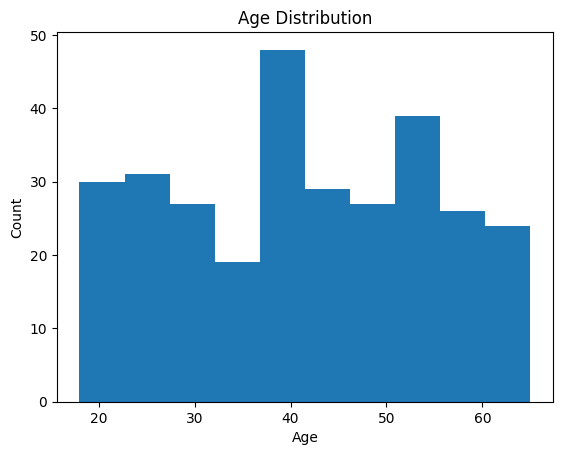

In [48]:
plt.hist(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


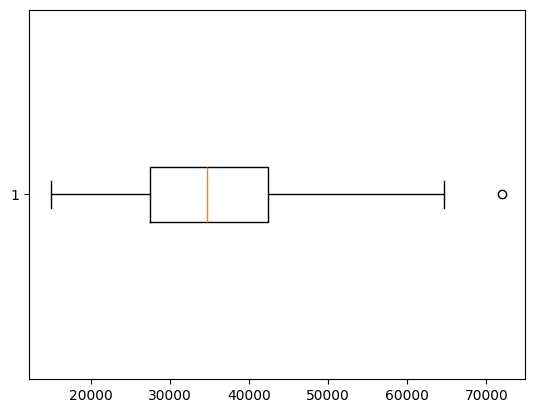

In [49]:
plt.boxplot(df['income'], vert = False)
plt.show()

Text(0.5, 1.0, 'Income Distribution')

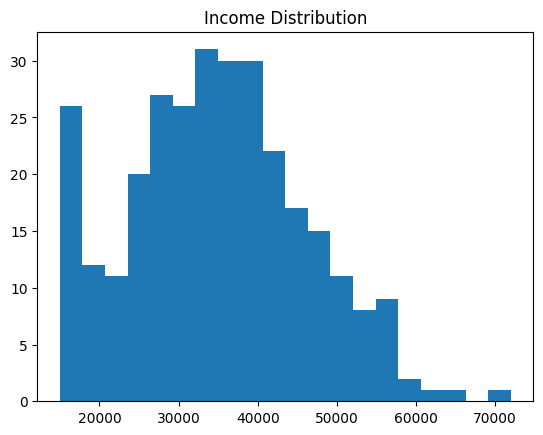

In [50]:
plt.hist(df['income'], bins=20)
plt.title('Income Distribution')

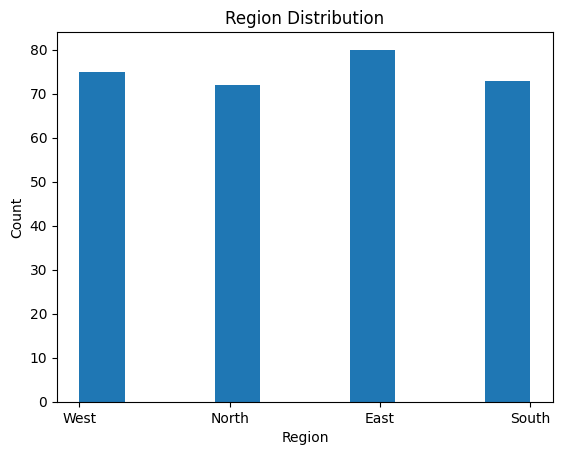

In [51]:
plt.hist(df['region'])
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

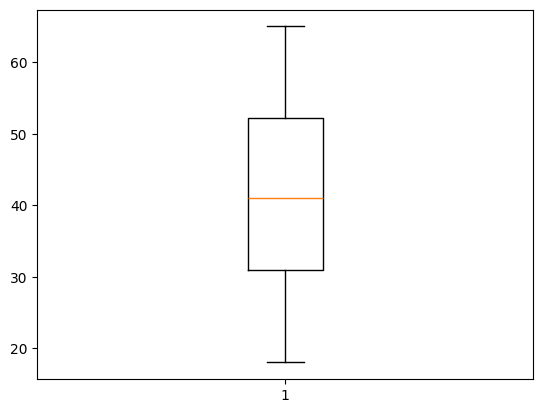

In [52]:
plt.boxplot(df['age'])
plt.show()


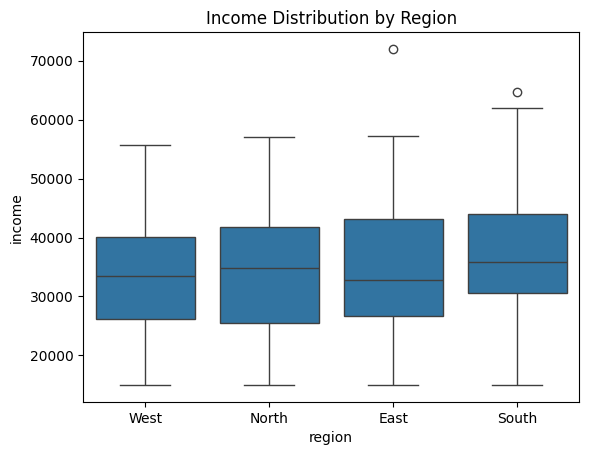

In [53]:
sns.boxplot(x='region', y='income', data=df)
plt.title('Income Distribution by Region')
plt.show()

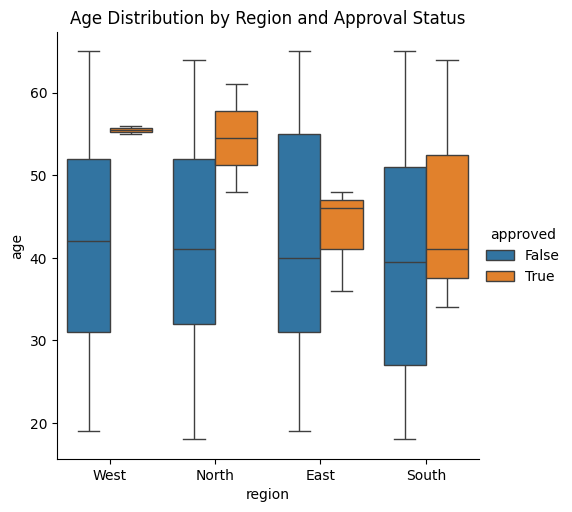

In [54]:
sns.catplot(x='region', y='age', hue='approved', kind='box', data=df)
plt.title('Age Distribution by Region and Approval Status') 
plt.show()

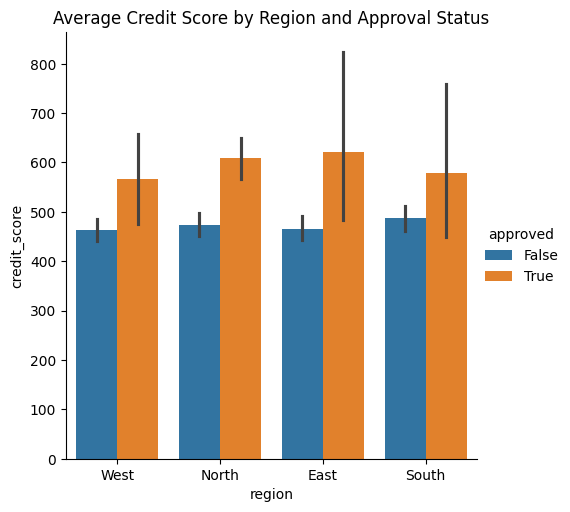

In [55]:
sns.catplot(x='region', y='credit_score', hue='approved', kind='bar', data=df)
plt.title('Average Credit Score by Region and Approval Status')
plt.show()

In [56]:
north = df[df.region == 'North']
south = df[df.region == 'South']
east = df[df.region == 'East']
west = df[df.region == 'West']

print('North Region:')
print(north.describe())

print('South Region:')
print(south.describe())

print('East Region:')
print(east.describe())

print('West Region:')
print(west.describe())

North Region:
             age   employed        income  credit_score     application_date
count  72.000000  72.000000     72.000000     72.000000                   72
mean   41.902778   0.500000  34771.888889    477.055556  2024-01-08 19:00:00
min    18.000000   0.000000  15000.000000    300.000000  2023-01-20 00:00:00
25%    32.000000   0.000000  25456.000000    397.750000  2023-08-20 06:00:00
50%    41.500000   0.500000  34800.500000    498.000000  2023-12-21 00:00:00
75%    52.000000   1.000000  41805.000000    546.250000  2024-05-30 18:00:00
max    64.000000   1.000000  57012.000000    692.000000  2024-12-17 00:00:00
std    11.900006   0.503509  11152.496914    100.043214                  NaN
South Region:
             age   employed        income  credit_score  \
count  73.000000  73.000000     73.000000     73.000000   
mean   39.767123   0.520548  36918.904110    490.246575   
min    18.000000   0.000000  15000.000000    300.000000   
25%    27.000000   0.000000  30566.000000  

In [57]:
num_cols = ['age', 'income', 'credit_score', 'employed', 'approved']
num_df   = df[num_cols].copy()

corr = num_df.corr(method='pearson' )
print(corr.round(3))



                age  income  credit_score  employed  approved
age           1.000   0.283         0.285    -0.011     0.106
income        0.283   1.000         0.903     0.349     0.225
credit_score  0.285   0.903         1.000     0.293     0.211
employed     -0.011   0.349         0.293     1.000     0.147
approved      0.106   0.225         0.211     0.147     1.000


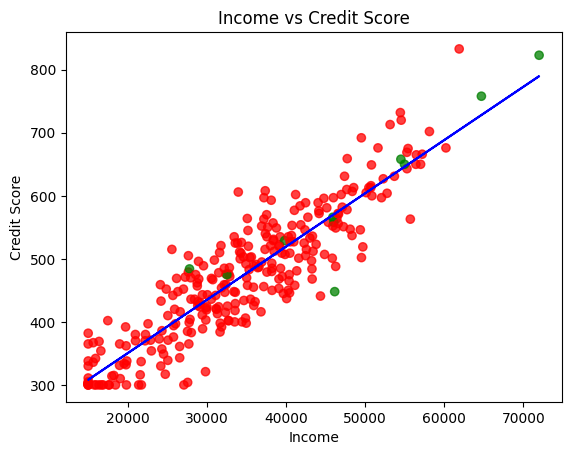

In [58]:
x = df['income']
y = df['credit_score']

plt.scatter(x, y, c=df['approved']
   .map({True: 'green', False: 'red'}), alpha=0.75)

m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label='Trend Line')


plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score')
plt.show()



In [59]:
#Columns that we want to keep ...
columns_to_keep = ['age', 'income', 'credit_score', 'employed', 'region', 'approved']
cleaned_df = df[columns_to_keep].copy()

cleaned_df.head()
#cleaned_df.info()

,age,income,credit_score,employed,region,approved
0,22,39879,507,0,West,False
1,55,39475,509,1,North,False
2,49,36435,486,0,East,False
3,39,15000,311,1,East,False
4,38,27037,452,1,West,False


In [60]:
#Missing values for numeric columns:
df['age']    = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())


In [61]:
#NOTE: all values within a row must be identical to be considered a duplicate
#Drop rows with duplicate values 
print('\nNumber of duplicated rows:', df.duplicated().sum())
df = df.drop_duplicates()



Number of duplicated rows: 0


In [62]:
#Create features for the dataframes
#df['age_squared'] = df['age'] ** 2
#df['income_log'] = np.log1p(df['income'])
#df['credit_score_bin'] = pd.cut(df['credit_score'], bins=[0, 600, 700, 800, 900], labels=[1, 2, 3, 4])
#df['is_employed'] = df['employed'].apply(lambda x: 1 if x == True else 0)
#df['application_month'] = df['application_date'].dt.month

# Create a new binary feature 'high_risk' based on credit score and income
#df['high_risk'] = (df['credit_score'] < 300).astype(int)
df['high_risk'] = ((df['credit_score'] < 300) & (df['income'] < 20000)).astype(int)


#df['high_risk'] = (df['credit_score'] < 300).astype(bool)
#df['high_risk'] = df['credit_score'].apply(lambda x: 1 if x < 600 else 0)


In [63]:
df.head()

,age,employed,income,credit_score,region,application_date,approved,high_risk
0,22,0,39879,507,West,2023-04-26,False,0
1,55,1,39475,509,North,2023-10-09,False,0
2,49,0,36435,486,East,2024-07-04,False,0
3,39,1,15000,311,East,2023-07-17,False,0
4,38,1,27037,452,West,2023-04-07,False,0


In [64]:
X = df.drop(columns=['approved', 'application_date'])
y = df['approved']

print(X.shape, Y.shape) # OUTPUTs: X.shape = (300, 6) Y.shape = (300, )


(300, 6) (300,)


In [65]:
#Change the region column to one-hot encoding
#X = pd.get_dummies(X, columns=['region'], drop_first=True)
X = pd.get_dummies(X, columns=['region'])
X.head()


,age,employed,income,credit_score,high_risk,region_East,region_North,region_South,region_West
0,22,0,39879,507,0,False,False,False,True
1,55,1,39475,509,0,False,True,False,False
2,49,0,36435,486,0,True,False,False,False
3,39,1,15000,311,0,True,False,False,False
4,38,1,27037,452,0,False,False,False,True


In [66]:
# We need training data ... split the data into training and testing sets: X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print(X_train.shape)
print(X_test.shape)


(240, 9)
(60, 9)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [68]:
from sklearn.metrics import accuracy_score

#NOTE: Training ...
#      X_train and show it the corresponding Y_train values ...
#      y_test is the actual values for the test data ...
#      y_pred is what the model predicts for the X_test data ...

y_pred   = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9833333333333333
